<h1 style="color:#0071DC; text-align:center; background-color:#e7e9eb;">** UK Road Accidents Data Analysis ** </h1> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and reading the data from csv file

accident_df = pd.read_csv("road_accident.csv")

In [3]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   accident_index           307973 non-null  object
 1   accident_date            307973 non-null  object
 2   day_of_week              307973 non-null  object
 3   junction_control         307973 non-null  object
 4   junction_detail          307973 non-null  object
 5   accident_severity        307973 non-null  object
 6   light_conditions         307973 non-null  object
 7   local_authority          307973 non-null  object
 8   carriageway_hazards      307970 non-null  object
 9   number_of_casualties     307973 non-null  int64 
 10  number_of_vehicles       307973 non-null  int64 
 11  police_force             307973 non-null  object
 12  road_surface_conditions  307973 non-null  object
 13  road_type                307973 non-null  object
 14  speed_limit         

In [4]:
# Display the top 5 rows
accident_df.head()

,accident_index,accident_date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority,carriageway_hazards,number_of_casualties,number_of_vehicles,police_force,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,None,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,None,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,None,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,None,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,None,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [5]:
accident_df.describe()

,number_of_casualties,number_of_vehicles,speed_limit
count,307973.000000,307973.000000,307973.000000
mean,1.356882,1.829063,38.866037
std,0.815857,0.710477,14.032933
min,1.000000,1.000000,10.000000
25%,1.000000,1.000000,30.000000
50%,1.000000,2.000000,30.000000
75%,1.000000,2.000000,50.000000
max,48.000000,32.000000,70.000000


In [6]:
# Create and add the year column
accident_df.insert(2, 'year', pd.DatetimeIndex(accident_df['accident_date']).year)
accident_df.head(3)


C:\Users\chaki\AppData\Local\Temp\ipykernel_20148\3502486498.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  accident_df.insert(2, 'year', pd.DatetimeIndex(accident_df['accident_date']).year)


,accident_index,accident_date,year,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority,carriageway_hazards,number_of_casualties,number_of_vehicles,police_force,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type
0,BS0000001,01-01-2021,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,None,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,2021,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,None,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,None,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car


In [7]:
# Calculate the total number of casualties
total_casualties=accident_df['number_of_casualties'].sum()
print('The total casualties is: ',total_casualties)

The total casualties is:  417883


In [8]:
# Calculate current year casualties and the percentage of change year to year
cy_casualties_df=accident_df.groupby('year')['number_of_casualties'].sum().reset_index()
print('Current year casualties are: ', cy_casualties_df.loc[1, 'number_of_casualties'])
print('PCT Change is: ', round(cy_casualties_df.pct_change().loc[1, 'number_of_casualties']*100, 1),'%')

Current year casualties are:  195737
PCT Change is:  -11.9 %


In [9]:
# Calculate current year count of accidents and the percentage of change year to year

cy_accidents_df=accident_df.groupby('year')['accident_index'].count().reset_index()
print('Current year accidents are: ', cy_accidents_df.loc[1, 'accident_index'])
print('PCT Change is: ', round(cy_accidents_df.pct_change().loc[1, 'accident_index']*100, 1),'%')

Current year accidents are:  144419
PCT Change is:  -11.7 %


In [10]:
# Calculate the number of casualties by accident severity
severity_df=accident_df.groupby(['year','accident_severity'])['number_of_casualties'].sum().reset_index()

#print('Current year fatal accidents number is: ', cy_fatal_df.loc[1, 'accident_severity'])
print(severity_df)


   year accident_severity  number_of_casualties
0  2021             Fatal                  4280
1  2021           Serious                 32267
2  2021            Slight                185599
3  2022             Fatal                  2855
4  2022           Serious                 27045
5  2022            Slight                165837


In [11]:
# Calculate casualties by vehicle type for the year 2022

# Filter data for the year 2022
accident_2022_df = accident_df[accident_df['year'] == 2022]

# Define the mapping for vehicle groups
vehicle_group_mapping = {
    'Car': 'Cars',
    'Taxi/Private hire car': 'Cars',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Motorcycle over 500cc': 'Motorcycle',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Minibus (8 - 16 passenger seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Trucks',
    'Goods over 3.5t. and under 7.5t': 'Trucks',
    'Van / Goods 3.5 tonnes mgw or under': 'Trucks',
    'Agricultural vehicle': 'Agricultural'
}

# Apply the mapping to create a new column for vehicle groups
accident_2022_df['vehicle_group'] = accident_2022_df['vehicle_type'].map(vehicle_group_mapping).fillna('Other')

# Group by vehicle_group and calculate the sum of casualties
accident_2022_by_vehicle_df = accident_2022_df.groupby('vehicle_group')['number_of_casualties'].sum().reset_index()

# Rename the columns to match the expected output
accident_2022_by_vehicle_df.columns = ['vehicle_group', '2022_casualties']

# Sort in descending order
accident_2022_by_vehicle_df=accident_2022_by_vehicle_df.sort_values(by='2022_casualties',ascending=False).reset_index()

print(accident_2022_by_vehicle_df)


   index vehicle_group  2022_casualties
0      2          Cars           155804
1      5        Trucks            15905
2      3    Motorcycle            15579
3      1           Bus             6573
4      4         Other             1477
5      0  Agricultural              399


C:\Users\chaki\AppData\Local\Temp\ipykernel_20148\1734216399.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_2022_df['vehicle_group'] = accident_2022_df['vehicle_type'].map(vehicle_group_mapping).fillna('Other')


In [12]:
# Create and add the month column

#accident_df=accident_df.drop('month', axis=1) # Run if column already exist

accident_df['accident_date']=pd.to_datetime(accident_df['accident_date']) # Convert accident_date column data type from string to date format

accident_df.insert(2, 'month', accident_df['accident_date'].dt.month_name().str.slice(stop=3)) 
accident_df.head(3)

C:\Users\chaki\AppData\Local\Temp\ipykernel_20148\91377313.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  accident_df['accident_date']=pd.to_datetime(accident_df['accident_date']) # Convert accident_date column data type from string to date format


,accident_index,accident_date,month,year,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority,...,number_of_casualties,number_of_vehicles,police_force,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type
0,BS0000001,2021-01-01,Jan,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,2021-05-01,May,2021,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-04-01,Apr,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car


In [13]:
# Calculate the number of casualties by month
month_casualties_df=accident_df.groupby(['year','month'])['number_of_casualties'].sum().reset_index()
month_casualties_df.head(5)

,year,month,number_of_casualties
0,2021,Apr,17753
1,2021,Aug,18827
2,2021,Dec,17273
3,2021,Feb,15474
4,2021,Jan,19397


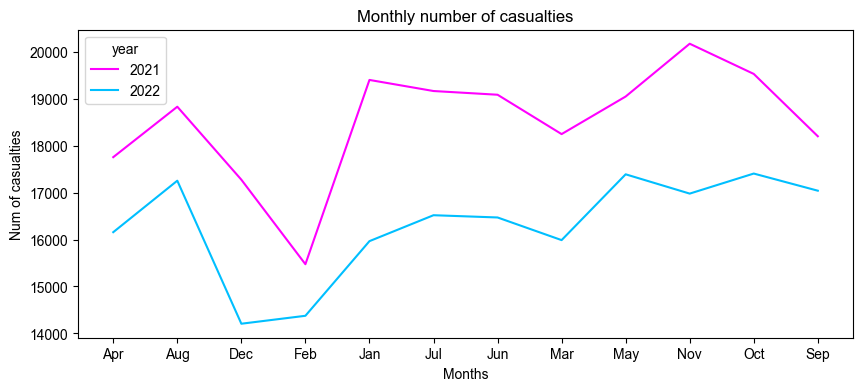

In [14]:
# Plot a line chart to display and compare the monthly number of casualties for each year
plt.figure(figsize=(10, 4)) # set the size of the figure

sns.lineplot(x='month', y='number_of_casualties', data=month_casualties_df, hue='year', palette=['magenta', 'deepskyblue'], linestyle='solid').set(title='Monthly number of casualties', xlabel='Months', ylabel='Num of casualties')
sns.set_style("white")
plt.show()

In [15]:
# Calculate casualties by road type and sort descending

road_type_casualties_df=accident_df.groupby('road_type')['number_of_casualties'].sum().reset_index()
road_type_casualties_df=road_type_casualties_df.sort_values('number_of_casualties',ascending=False)
road_type_casualties_df.head(5)

,road_type,number_of_casualties
3,Single carriageway,309698
0,Dual carriageway,67368
2,Roundabout,26828
1,One way street,7389
4,Slip road,6600


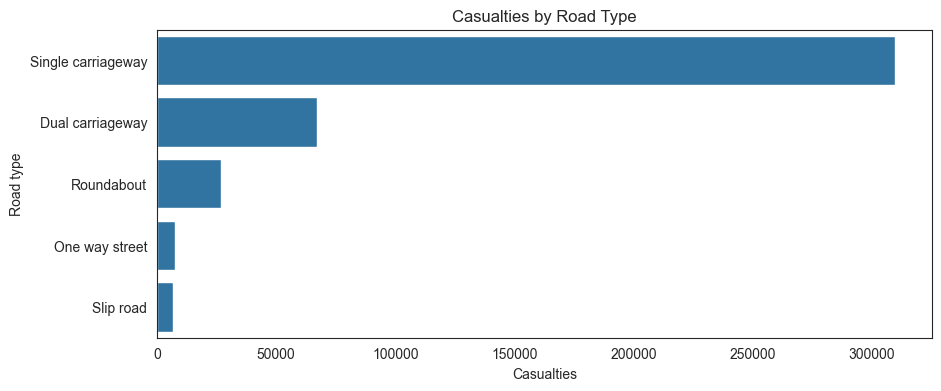

In [16]:
plt.figure(figsize=(10, 4)) # set the size of the figure

# Plot a bar chart to show the number of casualties by road type
sns.barplot(x='number_of_casualties', y='road_type', data=road_type_casualties_df, orient="h").set(title='Casualties by Road Type', xlabel='Casualties', ylabel='Road type')

plt.show()

In [17]:
# Calculate casualties by road type and sort descending

area_type_casualties_df=accident_df.groupby('urban_or_rural_area')['number_of_casualties'].sum().reset_index()
area_type_casualties_df=area_type_casualties_df.sort_values('number_of_casualties',ascending=False)
area_type_casualties_df.head(5)

,urban_or_rural_area,number_of_casualties
1,Urban,255864
0,Rural,162019


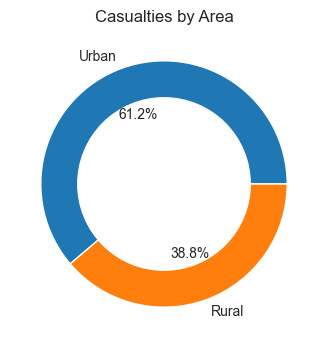

In [18]:
plt.figure(figsize=(10, 4)) # change the size of a figure

plt.pie(area_type_casualties_df['number_of_casualties'], labels=area_type_casualties_df['urban_or_rural_area'], autopct='%1.1f%%')
plt.title('Casualties by Area')

# add a circle at the center to transform the pie chart to a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [19]:
# Filter accicedent_df table to keep only the needed columns

light_condition_casualties_df = accident_df[['light_conditions','number_of_casualties']]

light_condition_casualties_df.head()

,light_conditions,number_of_casualties
0,Daylight,1
1,Daylight,11
2,Daylight,1
3,Daylight,1
4,Darkness - lights lit,1


In [20]:
# Define the mapping for light conditions
light_condition_mapping = {
    'Daylight': 'Day',
    'Darkness - lighting unknown':'Night',
    'Darkness - lights lit': 'Night',
    'Darkness - lights unlit': 'Night',
    'Darkness - no lighting': 'Night',
    }

# Mapping the table to group by night and day conditions

light_condition_casualties_df['lighting'] = light_condition_casualties_df['light_conditions'].map(light_condition_mapping).fillna('Other')

light_condition_casualties_df.head()

C:\Users\chaki\AppData\Local\Temp\ipykernel_20148\253560641.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light_condition_casualties_df['lighting'] = light_condition_casualties_df['light_conditions'].map(light_condition_mapping).fillna('Other')


,light_conditions,number_of_casualties,lighting
0,Daylight,1,Day
1,Daylight,11,Day
2,Daylight,1,Day
3,Daylight,1,Day
4,Darkness - lights lit,1,Night


In [21]:
# Filter and remove the lihgt_conditions colum
light_plot=light_condition_casualties_df[['number_of_casualties','lighting']]
light_plot.head()

,number_of_casualties,lighting
0,1,Day
1,11,Day
2,1,Day
3,1,Day
4,1,Night


In [22]:
# Group and sum by night/day condition
light_plot =light_plot.groupby('lighting')['number_of_casualties'].sum().reset_index()
light_plot.head()

,lighting,number_of_casualties
0,Day,304963
1,Night,112920


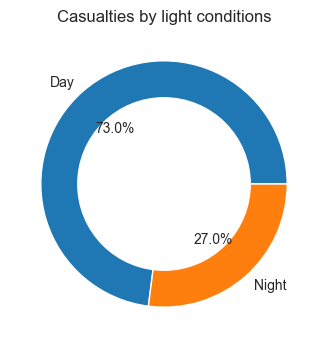

In [23]:
#Plot pie chart for casualties by night and day conditions 

plt.figure(figsize=(10, 4)) # change the size of a figure

plt.pie(light_plot['number_of_casualties'], labels=light_plot['lighting'], autopct='%1.1f%%')
plt.title('Casualties by light conditions')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [24]:
import folium

In [25]:
# Create the coordinates dataframe

location_casualties_df = pd.read_csv("coordinates_data.csv", sep=';')

location_casualties_df.head()

,latitude,longitude,Local_Authority_(District),Number_of_Casualties
0,"51,5100","-0,2000",Kensington and Chelsea,1
1,"51,5100","-0,2000",Kensington and Chelsea,11
2,"51,4900","-0,1800",Kensington and Chelsea,1
3,"51,5100","-0,2000",Kensington and Chelsea,1
4,"51,4800","-0,1700",Kensington and Chelsea,1


In [26]:
# Convert the longitude and latitude columns to numeric values
location_casualties_df['latitude'] = location_casualties_df['latitude'].str.replace(',', '.').astype(float)
location_casualties_df['longitude'] = location_casualties_df['longitude'].str.replace(',', '.').astype(float)

location_casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   latitude                    307973 non-null  float64
 1   longitude                   307973 non-null  float64
 2   Local_Authority_(District)  307973 non-null  object 
 3   Number_of_Casualties        307973 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 9.4+ MB


In [31]:
# Grouping the data by Local_Authority_(District) and calculating the mean of latitude and longitude, and sum of Number_of_Casualties
grouped_locations_df = location_casualties_df.groupby('Local_Authority_(District)').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'Number_of_Casualties': 'sum'
}).reset_index()

# Display the resulting smaller dataframe
grouped_locations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Local_Authority_(District)  422 non-null    object 
 1   latitude                    422 non-null    float64
 2   longitude                   422 non-null    float64
 3   Number_of_Casualties        422 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.3+ KB


In [32]:
# Create and center the map
mymap = folium.Map(location=(53.5500, -2.4333), zoom_start=6, tiles="cartodb positron")

# Add the GeoJSON file to the map (ensure the path is correct)
folium.GeoJson('uk_regions.geojson').add_to(mymap)

# Function to choose marker color based on number of casualties
def get_marker_color(casualties):
    if casualties < 50:
        return 'green'
    elif 50 <= casualties < 100:
        return 'orange'
    else:
        return 'red'

# Add markers to the map
for idx, row in grouped_locations_df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=max(3, min(row['Number_of_Casualties'] / 10, 15)),  # Scale the circle size
        color=get_marker_color(row['Number_of_Casualties']),
        fill=True,
        fill_color=get_marker_color(row['Number_of_Casualties']),
        fill_opacity=0.7,
        popup=folium.Popup(f"Number of Casualties: {row['Number_of_Casualties']}", parse_html=True)
    ).add_to(mymap)

# Save map to an HTML file
mymap.save("casualties_map.html")

# Display the map in the notebook
mymap
